# Chapter 3 비지도 학습과 데이터 전처리

## 비지도 학습의 종류
### 1. 비지도 변환 Unsupervised Transformation
- 데이터를 새롭게 표현해 더 쉽게 해석할 수 있도록 하는 알고리즘
- 주로 특성 수 줄이며 필요한 특징만 남기는 차원 축소 (dimentionality reduction). (예: 2차원으로 축소 - 시각화)
- 데이터를 구성하는 단위나 성분 찾기. (예: 텍스트에서 주제 추출)

### 2. 군집 Clustering
- 데이터를 비슷한 것끼리 그룹으로 묶는 것

#### 비지도 학습의 결과 평가는 직접 확인하는 것이 유일할 때가 많음. 데이터 이해, 탐색적 분석 단계에서 많이 사용. 지도 학습의 전처리 단계에서도 사용. 스케일 조정 메서드의 경우 지도 정보 (supervised information)를 사용하지 않기에 비지도.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Intro to ML basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


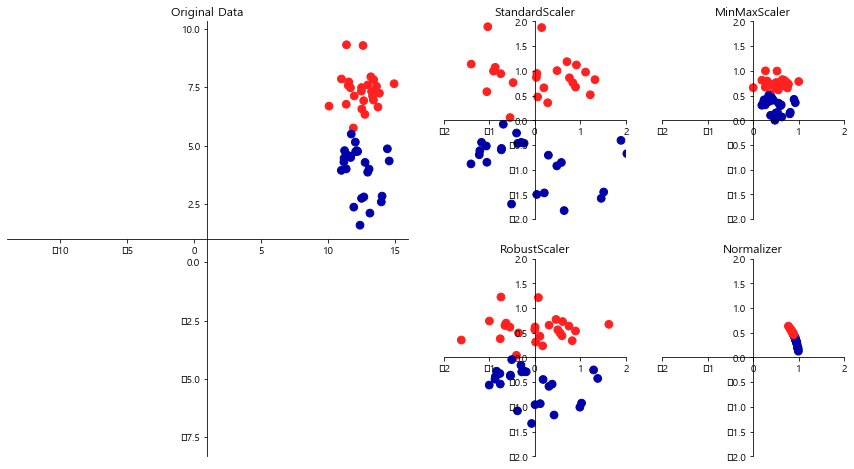

In [3]:
mglearn.plots.plot_scaling()

- StandardScaler: (x-xbar)/sigma.  표준값.  z-score.
- RobustScaler: z-score와 비슷하지만, 평균과 분산 대신 median, quartile 사용 -> outlier에 영향받지 않는다.
    
- MinMaxScaler: 모든 특성이 0과 1 사이에 위치. (x - min(x)) / (max(x) - min(x))
    
- Normalizer: 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정. 즉, 지름이 1인 원(3차원에서 구)에 데이터 포인트 투영. 각 데이터 포인트가 다른 비율로 (길이에 반비례하여) 스케일 조정됨. 특성 벡터의 길이는 상관 없고 데이터의 방향 (각도) 만이 중요할 때 많이 사용된다.  # norm 매개변수: l1, l2, max (default=l2 즉 유클리디안 거리). Standard, Robust, MinMax는 각 열(특성)의 통계치를 이용하지만, Normalizer는 행(데이터포인트)마다 각각 정규화된다.

## 3.3.2 데이터 변환 적용하기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train_scaled = scaler.transform(X_train) # 데이터 변환
print('변환 후 크기:', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값:\n', X_train.max(axis=0))
print('스케일 조정 후 특성별 최소값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_train_scaled.max(axis=0))

변환 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
X_test_scaled = scaler.transform(X_test) # 테스트 데이터도 변환해준다
print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [9]:
# 여기서 transform 메서드는 테스트 세트가 아닌 트레이닝 세트의 MinMax 값과 범위를 사용했으므로,
# test set 스케일 조정 후 범위는 0~1 범위에 정확하게 맞아 떨어지진 않는다.

## 3.3.3 Quantile Transformer & PowerTransformer

In [10]:
# Quantile Transformer는 기본적으로 1000개의 quantile을 사용하여 데이터를 균등하게 분포시킨다.
# robustscaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축한다.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

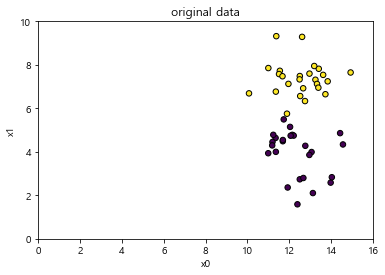

In [12]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('original data')
plt.show()

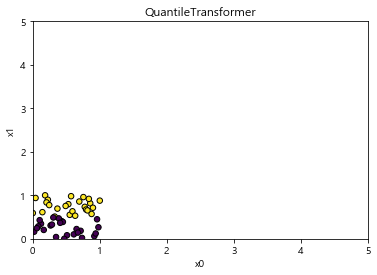

In [13]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

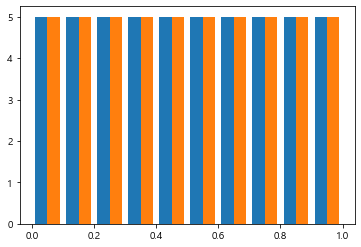

In [14]:
plt.hist(X_trans)
plt.show()

In [15]:
print(scaler.quantiles_.shape)

(50, 2)


In [16]:
scaler.n_quantiles

1000

In [17]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [18]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


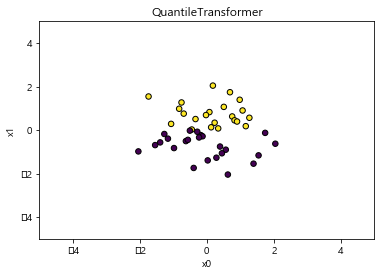

In [19]:
scaler = QuantileTransformer(output_distribution='normal') # 균등 분포가 아닌 정규분포로 출력할 수 있다.
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

In [20]:
# PowerTransformer: 데이터의 특성별로 정규분포 형태에 가깝도록 변환시켜 줌.
# method 매개변수에 'yeo-johnson' (default), 'box-cox'

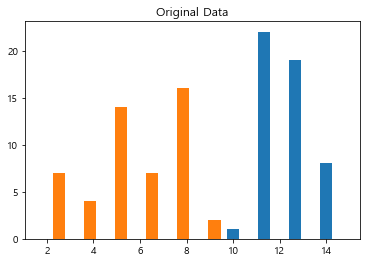

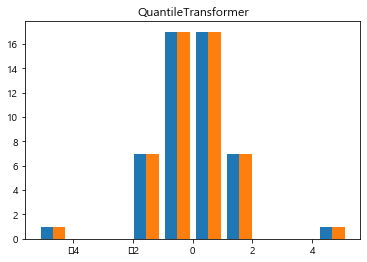

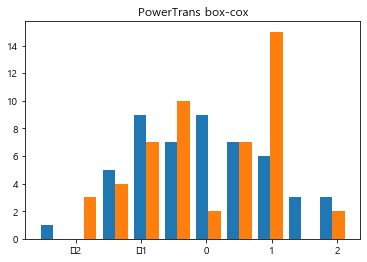

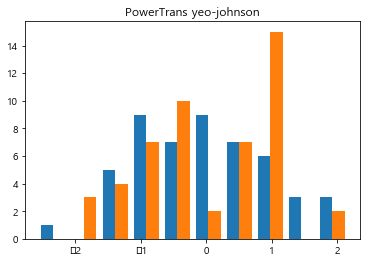

In [21]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTrans box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTrans yeo-johnson')
plt.show()

## 3.3.4 train data & test data 스케일 같은 방법으로 조정하기
#### train set와 test set에 같은 변환을 적용해야한다!

### 다음 예: test set의 스케일을 따로 조정했을 때 나타나는 문제점 (train, test 각각의 최소값과 범위 사용해 조정)

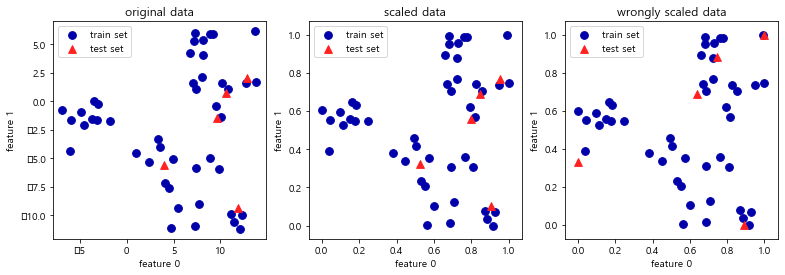

In [22]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2) # random dataset 생성
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# train, test set 산점도
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('original data')

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[1].legend(loc='upper left')
axes[1].set_title('scaled data')

# test set에 scale을 따로 조정한다. test set의 최소값 0 최대값 1 됨. 절대로 이렇게 하면 안 됨.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='train set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].legend(loc='upper left')
axes[2].set_title('wrongly scaled data')

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

### original -> scaled: x, y 축 눈금만 바뀜
### wrongly scaled: 테스트 포인트는 스케일이 다르게 조정됨. 다른 비율. 뒤죽박죽.
- X_scaled = scaler.fit(X_train).transform(X_train)
- X_scaled = scaler.fit_transform(X_train)
### 이 두 식은 같음.

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [23]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)

svm.fit(X_train, y_train)
print('test set acc: {:.3f}'.format(svm.score(X_test, y_test)))

test set acc: 0.629


In [24]:
scaler = MinMaxScaler() # 0~1 사이로 스케일 조정
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('scaled test set acc: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

scaled test set acc: 0.965


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('scaled test set acc: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

scaled test set acc: 0.958
